<a href="https://colab.research.google.com/github/kareemullah123456789/big_data_advanced/blob/main/1_book_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

# Check if a SparkSession already exists
spark = SparkSession.getActiveSession()

# If exists, stop it
if spark is not None:
    spark.stop()
    print("Stopped existing SparkSession")

# Create a new SparkSession
spark = (SparkSession
         .builder
         .appName("Analyzing the vocabulary of Pride and Prejudice.")
         .getOrCreate())

In [ ]:
#spark.sparkContext.setLogLevel("ALL")


In [ ]:
 spark.read

In [ ]:
dir(spark.read)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_df',
 '_jreader',
 '_set_opts',
 '_spark',
 'csv',
 'format',
 'jdbc',
 'json',
 'load',
 'option',
 'options',
 'orc',
 'parquet',
 'schema',
 'table',
 'text']

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F


spark = SparkSession.builder.appName(
    "Counting word occurences from a book."
).getOrCreate()

spark.sparkContext.setLogLevel("WARN")

In [ ]:

# import requests
# import os
# from pyspark.sql import SparkSession
# from pyspark.sql import functions as F

# # GitHub raw file URL (replace with your own file URL)
# github_url = "https://raw.githubusercontent.com/kareemullah123456789/DataAnalysisWithPythonAndPySpark-Data/trunk/gutenberg_books/1342-0.txt"

# # Local filename to save the downloaded file
# local_filename = "1342-0.txt"

# # Download the file from GitHub
# response = requests.get(github_url)
# with open(local_filename, "wb") as f:
#     f.write(response.content)

# # Initialize Spark session
# spark = SparkSession.builder.appName("GitHubTextAnalysis").getOrCreate()

# # Load the downloaded text file into PySpark
# text_df = spark.read.text(local_filename)

# # Process the text: Tokenization, Cleaning, and Word Count
# results = (
#     text_df
#     .select(F.split(F.col("value"), " ").alias("line"))  # Split into words
#     .select(F.explode(F.col("line")).alias("word"))  # Flatten into rows
#     .select(F.lower(F.col("word")).alias("word"))  # Convert to lowercase
#     .select(F.regexp_extract(F.col("word"), "[a-z']*", 0).alias("word"))  # Extract words only
#     .where(F.col("word") != "")  # Remove empty words
#     .groupBy("word")
#     .count()
# )

# # Show top 10 most frequent words
# results.orderBy("count", ascending=False).show(10)

# # Save results as a CSV file
# results.coalesce(1).write.csv("./github_results.csv", header=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/cde_data

 data.csv
'pyngrok_UI_CODE_Working_with_RDDs_in_PySpark_(2).ipynb'
 pyspark_tutorial.ipynb
 sales_data.csv
 sample_data.csv
 Section_2_Resilient_Distributed_Datasets_Transformations.ipynb
 Section_3_Resilient_Distributed_Datasets_Actions.ipynb
 Section_4_Spark_DataFrames_and_Transformations.ipynb
 Spark_SQL.ipynb


In [ ]:
import requests
import os
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Mount Google Drive (ensure it's mounted before running)
drive_path = "/content/drive/MyDrive/cde_data"  # Change this to your preferred folder in Google Drive
os.makedirs(drive_path, exist_ok=True)

# GitHub raw file URL
github_url = "https://raw.githubusercontent.com/kareemullah123456789/DataAnalysisWithPythonAndPySpark-Data/trunk/gutenberg_books/1342-0.txt"

# Save file in Google Drive
local_filename = os.path.join(drive_path, "1342-0.txt")

# Download the file from GitHub
response = requests.get(github_url)
with open(local_filename, "wb") as f:
    f.write(response.content)

print(f"File downloaded to: {local_filename}")


File downloaded to: /content/drive/MyDrive/cde_data/1342-0.txt


In [ ]:
# Initialize Spark session
spark = SparkSession.builder.appName("prideandprejudice").getOrCreate()

# Load the text file from Google Drive
text_df = spark.read.text(local_filename)

# Process the text: Tokenization, Cleaning, and Word Count
results = (
    text_df
    .select(F.split(F.col("value"), " ").alias("line"))  # Split into words
    .select(F.explode(F.col("line")).alias("word"))  # Flatten into rows
    .select(F.lower(F.col("word")).alias("word"))  # Convert to lowercase
    .select(F.regexp_extract(F.col("word"), "[a-z']*", 0).alias("word"))  # Extract words only
    .where(F.col("word") != "")  # Remove empty words
    .groupBy("word")
    .count()
)

# Show top 10 most frequent words
results.orderBy("count", ascending=False).show(10)


+----+-----+
|word|count|
+----+-----+
| the| 4480|
|  to| 4218|
|  of| 3711|
| and| 3504|
| her| 2199|
|   a| 1982|
|  in| 1909|
| was| 1838|
|   i| 1749|
| she| 1668|
+----+-----+
only showing top 10 rows



In [ ]:
output_path = os.path.join(drive_path, "prideandprejudice.csv")
results.coalesce(1).write.csv(output_path, header=True)

print(f"Results saved to: {output_path}")


AnalysisException: [PATH_ALREADY_EXISTS] Path file:/content/drive/MyDrive/cde_data/prideandprejudice.csv already exists. Set mode as "overwrite" to overwrite the existing path.

In [ ]:
 book = spark.read.text(local_filename)
 book
 # DataFrame[value: string

DataFrame[value: string]

In [ ]:
book.printSchema()

root
 |-- value: string (nullable = true)



In [ ]:
results.printSchema()

root
 |-- word: string (nullable = false)
 |-- count: long (nullable = false)



In [ ]:
book.show()

+--------------------+
|               value|
+--------------------+
|The Project Guten...|
|                    |
|This eBook is for...|
|almost no restric...|
|re-use it under t...|
|with this eBook o...|
|                    |
|                    |
|Title: Pride and ...|
|                    |
| Author: Jane Austen|
|                    |
|Posting Date: Aug...|
|Release Date: Jun...|
|Last Updated: Mar...|
|                    |
|   Language: English|
|                    |
|Character set enc...|
|                    |
+--------------------+
only showing top 20 rows



In [ ]:
results.show()

+-------------+-----+
|         word|count|
+-------------+-----+
|       online|    4|
|         some|  203|
|        still|   72|
|          few|   72|
|         hope|  122|
|        those|   60|
|     cautious|    4|
|       lady's|    8|
|    imitation|    1|
|          art|    3|
|      solaced|    1|
|       poetry|    2|
|    arguments|    5|
| premeditated|    1|
|      elevate|    1|
|       doubts|    2|
|    destitute|    1|
|    solemnity|    5|
|gratification|    1|
|    connected|   14|
+-------------+-----+
only showing top 20 rows



In [ ]:
 book.show(10, truncate=50)

+--------------------------------------------------+
|                                             value|
+--------------------------------------------------+
|The Project Gutenberg EBook of Pride and Prejud...|
|                                                  |
|This eBook is for the use of anyone anywhere at...|
|almost no restrictions whatsoever.  You may cop...|
|re-use it under the terms of the Project Gutenb...|
|    with this eBook or online at www.gutenberg.org|
|                                                  |
|                                                  |
|                        Title: Pride and Prejudice|
|                                                  |
+--------------------------------------------------+
only showing top 10 rows



In [ ]:

 results.show(10, truncate=50)

+---------+-----+
|     word|count|
+---------+-----+
|   online|    4|
|     some|  203|
|    still|   72|
|      few|   72|
|     hope|  122|
|    those|   60|
| cautious|    4|
|   lady's|    8|
|imitation|    1|
|      art|    3|
+---------+-----+
only showing top 10 rows



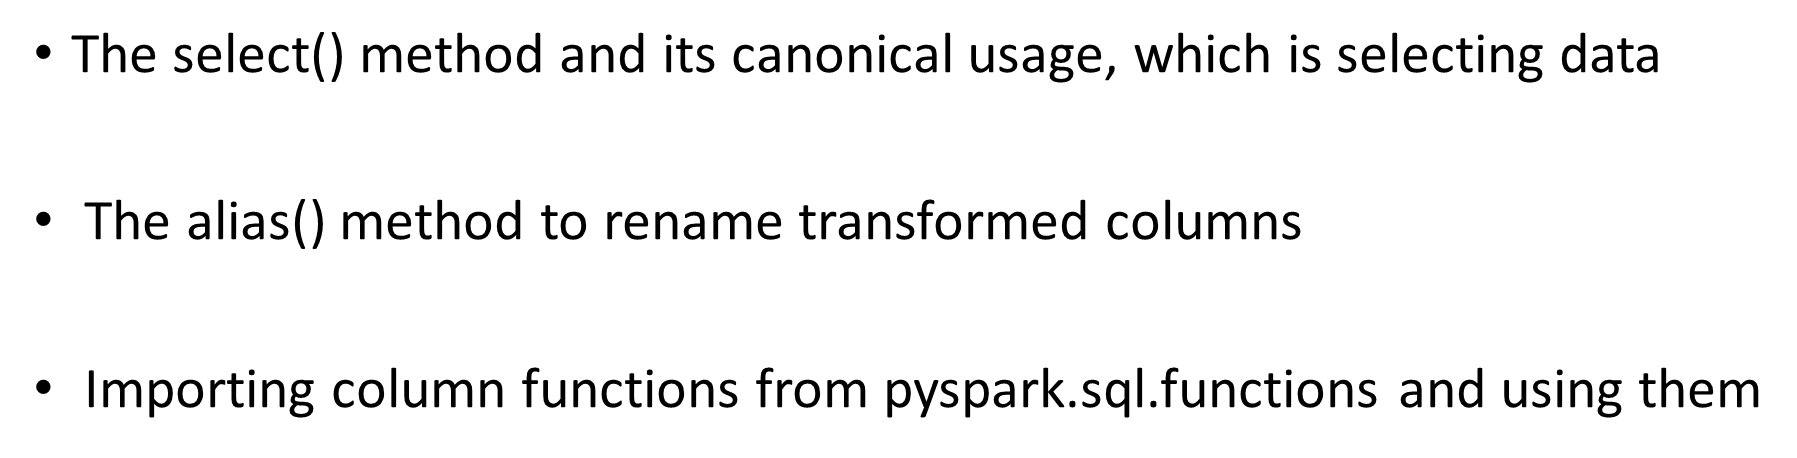

In [ ]:


 from pyspark.sql.functions import split
 lines = book.select(split(book.value, " ").alias("line"))
 lines.show(5)

+--------------------+
|                line|
+--------------------+
|[The, Project, Gu...|
|                  []|
|[This, eBook, is,...|
|[almost, no, rest...|
|[re-use, it, unde...|
+--------------------+
only showing top 5 rows



In [ ]:
 book.select(book.value)

DataFrame[value: string]

In [ ]:

# different ways of selecting
from pyspark.sql.functions import col
book.select(book.value)
book.select(book["value"])
book.select(col("value"))
book.select("value")


DataFrame[value: string]

In [ ]:
from pyspark.sql.functions import col, split
lines = book.select(split(col("value"), " "))
lines

DataFrame[split(value,  , -1): array<string>]

In [ ]:
#-- split(value,  , -1)  this is a default name
 lines.printSchema()

root
 |-- split(value,  , -1): array (nullable = true)
 |    |-- element: string (containsNull = false)



In [ ]:
lines.show(5)

+--------------------+
| split(value,  , -1)|
+--------------------+
|[The, Project, Gu...|
|                  []|
|[This, eBook, is,...|
|[almost, no, rest...|
|[re-use, it, unde...|
+--------------------+
only showing top 5 rows



In [ ]:
book.select(split(col("value"), " ")).printSchema()

root
 |-- split(value,  , -1): array (nullable = true)
 |    |-- element: string (containsNull = false)



In [ ]:
 book.select(split(col("value"), " ").alias("line")).printSchema()

root
 |-- line: array (nullable = true)
 |    |-- element: string (containsNull = false)



In [ ]:
 lines = book.select(split(book.value, " ").alias("line"))
lines

DataFrame[line: array<string>]

In [ ]:
 # This is messier, and you have to remember the name PySpark assigns automatically
lines = book.select(split(book.value, " "))
lines

DataFrame[split(value,  , -1): array<string>]

In [ ]:
lines = lines.withColumnRenamed("split(value,  , -1)", "line")
lines

DataFrame[line: array<string>]

In [ ]:
from pyspark.sql.functions import explode, col
words = lines.select(explode(col("line")).alias("word"))
words.show()

+----------+
|      word|
+----------+
|       The|
|   Project|
| Gutenberg|
|     EBook|
|        of|
|     Pride|
|       and|
|Prejudice,|
|        by|
|      Jane|
|    Austen|
|          |
|      This|
|     eBook|
|        is|
|       for|
|       the|
|       use|
|        of|
|    anyone|
+----------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import lower
words_lower = words.select(lower(col("word")).alias("word_lower"))
words_lower

DataFrame[word_lower: string]

In [ ]:
words_lower.show()

+----------+
|word_lower|
+----------+
|       the|
|   project|
| gutenberg|
|     ebook|
|        of|
|     pride|
|       and|
|prejudice,|
|        by|
|      jane|
|    austen|
|          |
|      this|
|     ebook|
|        is|
|       for|
|       the|
|       use|
|        of|
|    anyone|
+----------+
only showing top 20 rows



In [ ]:
# import requests
# import os
# from pyspark.sql import SparkSession
# from pyspark.sql import functions as F

# # Mount Google Drive (ensure it's mounted before running)
# drive_path = "/content/drive/MyDrive/cde_data"  # Change this to your preferred folder in Google Drive
# os.makedirs(drive_path, exist_ok=True)

# # GitHub raw file URL
# github_url = "https://github.com/kareemullah123456789/DataAnalysisWithPythonAndPySpark-Data/raw/refs/heads/trunk/list_of_numbers/sample.csv"

# # Save file in Google Drive
# numbers_filename = os.path.join(drive_path, "sample.csv")

# # Download the file from GitHub
# response = requests.get(github_url)
# with open(numbers_filename, "wb") as f:
#     f.write(response.content)

# print(f"File downloaded to: {local_filename}")


File downloaded to: /content/drive/MyDrive/cde_data/1342-0.txt


In [ ]:
# numbers_filename

'/content/drive/MyDrive/cde_data/sample.csv'

In [ ]:
# number_df = spark.read.text(numbers_filename)

In [ ]:
number_df.show()

+----------+
|     value|
+----------+
|old_column|
|         1|
|         4|
|         4|
|         5|
|         7|
|         7|
|         7|
|        10|
|        14|
|         1|
|         4|
|         8|
+----------+



In [ ]:
# from pyspark.sql.functions import explode, split, col

# solution_2_1_df = number_df.select(explode(split(col("value"), ",")).alias("exploded_value"))
# # solution_2_1_df.show()

In [ ]:
from pyspark.sql.functions import regexp_extract
words_clean = words_lower.select(
    regexp_extract(col("word_lower"), "[a-z]+", 0).alias("word")
)
words_clean.show()

+---------+
|     word|
+---------+
|      the|
|  project|
|gutenberg|
|    ebook|
|       of|
|    pride|
|      and|
|prejudice|
|       by|
|     jane|
|   austen|
|         |
|     this|
|    ebook|
|       is|
|      for|
|      the|
|      use|
|       of|
|   anyone|
+---------+
only showing top 20 rows



In [ ]:
words_nonull = words_clean.filter(col("word") != "")
words_nonull.show()

+---------+
|     word|
+---------+
|      the|
|  project|
|gutenberg|
|    ebook|
|       of|
|    pride|
|      and|
|prejudice|
|       by|
|     jane|
|   austen|
|     this|
|    ebook|
|       is|
|      for|
|      the|
|      use|
|       of|
|   anyone|
| anywhere|
+---------+
only showing top 20 rows



In [ ]:
groups = words_nonull.groupby(col("word"))
print(groups)
 # <pyspark.sql.group.GroupedData at 0x10ed23da0>
results = words_nonull.groupby(col("word")).count()
print(results)
 # DataFrame[word: string, count: bigint]
results.show()

GroupedData[grouping expressions: [word], value: [word: string], type: GroupBy]
DataFrame[word: string, count: bigint]
+-------------+-----+
|         word|count|
+-------------+-----+
|       online|    4|
|         some|  209|
|        still|   72|
|          few|   72|
|         hope|  122|
|        those|   60|
|     cautious|    4|
|    imitation|    1|
|          art|    3|
|      solaced|    1|
|       poetry|    2|
|    arguments|    5|
| premeditated|    1|
|      elevate|    1|
|       doubts|    2|
|    destitute|    1|
|    solemnity|    5|
|   lieutenant|    1|
|gratification|    1|
|    connected|   14|
+-------------+-----+
only showing top 20 rows



In [ ]:
results.orderBy("count", ascending=False).show(10)

+----+-----+
|word|count|
+----+-----+
| the| 4496|
|  to| 4235|
|  of| 3719|
| and| 3602|
| her| 2223|
|   i| 2052|
|   a| 1997|
|  in| 1920|
| was| 1844|
| she| 1703|
+----+-----+
only showing top 10 rows



In [ ]:
results.orderBy(col("count").desc()).show(10)

+----+-----+
|word|count|
+----+-----+
| the| 4496|
|  to| 4235|
|  of| 3719|
| and| 3602|
| her| 2223|
|   i| 2052|
|   a| 1997|
|  in| 1920|
| was| 1844|
| she| 1703|
+----+-----+
only showing top 10 rows



In [ ]:
 results.write.csv("/content/drive/MyDrive/cde_data/simple_count.csv")
 # The ls command is run using a shell, not a Python prompt.
 # If you use IPython, you can use the bang pattern (! ls -1).
 # Use this to get the same results without leaving the IPython console.
ls -1 ./content/drive/MyDrive/cde_data/

ls: cannot access './content/drive/MyDrive/cde_data/simple_count.csv': No such file or directory


In [ ]:

ls -1 /content/drive/MyDrive/cde_data/simple_count.csv

part-00000-53ef1dc5-b4c7-4720-8e4f-283551babb3b-c000.csv
_SUCCESS


In [ ]:
 results.coalesce(1).write.csv("/content/drive/MyDrive/cde_data/simple_count_single_partition.csv")

In [ ]:
 from pyspark.sql import SparkSession
 from pyspark.sql.functions import (
    col,
    explode,
    lower,
    regexp_extract,
    split,
 )
 spark = SparkSession.builder.appName(
    "Analyzing the vocabulary of Pride and Prejudice."
 ).getOrCreate()
book_final = spark.read.text("/content/drive/MyDrive/cde_data/1342-0.txt")
lines_final = book_final.select(split(book_final.value, " ").alias("line"))
words_final = lines_final.select(explode(col("line")).alias("word"))
words_lower_final = words_final.select(lower(col("word")).alias("word"))
words_clean_final = words_lower_final.select(
    regexp_extract(col("word"), "[a-z']*", 0).alias("word")
 )
words_nonull_final = words_clean_final.where(col("word") != "")
results_final = words_nonull_final.groupby(col("word")).count()
results_final.orderBy("count", ascending=False).show(10)
results_final.coalesce(1).write.csv("/content/drive/MyDrive/cde_data//simple_count_single_partition_final.csv")


+----+-----+
|word|count|
+----+-----+
| the| 4480|
|  to| 4218|
|  of| 3711|
| and| 3504|
| her| 2199|
|   a| 1982|
|  in| 1909|
| was| 1838|
|   i| 1749|
| she| 1668|
+----+-----+
only showing top 10 rows



In [ ]:
 #Simplifying our PySpark functions import
 # Before
 from pyspark.sql.functions import col, explode, lower, regexp_extract, split
 # After
 import pyspark.sql.functions as F

In [ ]:
# #  Simplifying our program via method chaining
# #select(),
# # where(), groupBy(), and count()
#  All transformations can be seen as pipes that ingest a structure and
#  return a modified structure.


In [ ]:

# We can avoid intermediate variables by chaining the results of one method to the next.
#  Since each transformation returns a data frame (or GroupedData, when we perform
#  the groupby() method), we can directly append the next method without assigning
#  the result to a variable. This means that we can eschew all but one variable assign
# ment.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/cde_data

 1342-0.txt
 data.csv
 prideandprejudice.csv
'pyngrok_UI_CODE_Working_with_RDDs_in_PySpark_(2).ipynb'
 pyspark_tutorial.ipynb
 sales_data.csv
 sample.csv
 sample_data.csv
 Section_2_Resilient_Distributed_Datasets_Transformations.ipynb
 Section_3_Resilient_Distributed_Datasets_Actions.ipynb
 Section_4_Spark_DataFrames_and_Transformations.ipynb
 simple_count.csv
 simple_count_single_partition.csv
 simple_count_single_partition_final.csv
 Spark_SQL.ipynb


In [ ]:
 # Before
book = spark.read.text("/content/drive/MyDrive/cde_data/1342-0.txt")
lines = book.select(split(book.value, " ").alias("line"))
words = lines.select(explode(col("line")).alias("word"))
words_lower = words.select(lower(col("word")).alias("word"))
words_clean = words_lower.select(
regexp_extract(col("word"), "[a-z']*", 0).alias("word")
 )
words_nonull = words_clean.where(col("word") != "")
results = words_nonull.groupby("word").count()
results.show()

+-------------+-----+
|         word|count|
+-------------+-----+
|       online|    4|
|         some|  203|
|        still|   72|
|          few|   72|
|         hope|  122|
|        those|   60|
|     cautious|    4|
|       lady's|    8|
|    imitation|    1|
|          art|    3|
|      solaced|    1|
|       poetry|    2|
|    arguments|    5|
| premeditated|    1|
|      elevate|    1|
|       doubts|    2|
|    destitute|    1|
|    solemnity|    5|
|gratification|    1|
|    connected|   14|
+-------------+-----+
only showing top 20 rows



In [ ]:
 # After chaining
 import pyspark.sql.functions as F
 results = (
    spark.read.text("/content/drive/MyDrive/cde_data/1342-0.txt")
    .select(F.split(F.col("value"), " ").alias("line"))
    .select(F.explode(F.col("line")).alias("word"))
    .select(F.lower(F.col("word")).alias("word"))
    .select(F.regexp_extract(F.col("word"), "[a-z']*", 0).alias("word"))
    .where(F.col("word") != "")
    .groupby("word")
    .count()
 )

 results.show()

+-------------+-----+
|         word|count|
+-------------+-----+
|       online|    4|
|         some|  203|
|        still|   72|
|          few|   72|
|         hope|  122|
|        those|   60|
|     cautious|    4|
|       lady's|    8|
|    imitation|    1|
|          art|    3|
|      solaced|    1|
|       poetry|    2|
|    arguments|    5|
| premeditated|    1|
|      elevate|    1|
|       doubts|    2|
|    destitute|    1|
|    solemnity|    5|
|gratification|    1|
|    connected|   14|
+-------------+-----+
only showing top 20 rows



In [ ]:
gutenberg_books

In [ ]:
 # After
results_all = spark.read.text('/content/drive/MyDrive/cde_data/*.txt')
results_all.show()

+--------------------+
|               value|
+--------------------+
|The Project Guten...|
|                    |
|This eBook is for...|
|almost no restric...|
|re-use it under t...|
|with this eBook o...|
|                    |
|                    |
|Title: Pride and ...|
|                    |
| Author: Jane Austen|
|                    |
|Posting Date: Aug...|
|Release Date: Jun...|
|Last Updated: Mar...|
|                    |
|   Language: English|
|                    |
|Character set enc...|
|                    |
+--------------------+
only showing top 20 rows

